# Step by Step Implementation

In [1]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Read the csv file using read_csv 
# method of pandas
df = pd.read_csv("C:\\Users\\vansh\\Downloads\\reliance new.csv")
df

,Date,Symbol,Series,Prev_Close,Open,High,Low,Last_Close,VWAP,Volume
0,01-01-1996,RELIANCE,EQ,204.65,205.00,206.10,203.65,205.75,205.26,3717450
1,02-01-1996,RELIANCE,EQ,205.75,205.25,206.25,202.65,204.15,204.13,6024650
2,03-01-1996,RELIANCE,EQ,204.15,207.50,216.95,205.25,205.70,207.04,7473500
3,04-01-1996,RELIANCE,EQ,205.70,203.75,204.40,201.05,203.80,202.47,7744000
4,05-01-1996,RELIANCE,EQ,203.80,203.00,203.00,200.65,202.40,202.05,5952000
...,...,...,...,...,...,...,...,...,...,...
6200,23-11-2020,RELIANCE,EQ,1899.50,1951.00,1970.00,1926.25,1950.70,1952.18,20918665
6201,24-11-2020,RELIANCE,EQ,1950.70,1964.00,1974.00,1932.00,1964.05,1952.11,14277083
6202,25-11-2020,RELIANCE,EQ,1964.05,1980.00,1992.95,1942.20,1947.80,1969.06,15062376
6203,26-11-2020,RELIANCE,EQ,1947.80,1953.05,1965.00,1930.05,1952.60,1946.67,11924527


In [3]:
# Changes The Date column as index columns
df.index = pd.to_datetime(df['Date'])
df

# drop The original date column
df = df.drop(['Date'], axis='columns')
df


,Symbol,Series,Prev_Close,Open,High,Low,Last_Close,VWAP,Volume
Date,,,,,,,,,
1996-01-01,RELIANCE,EQ,204.65,205.00,206.10,203.65,205.75,205.26,3717450
1996-02-01,RELIANCE,EQ,205.75,205.25,206.25,202.65,204.15,204.13,6024650
1996-03-01,RELIANCE,EQ,204.15,207.50,216.95,205.25,205.70,207.04,7473500
1996-04-01,RELIANCE,EQ,205.70,203.75,204.40,201.05,203.80,202.47,7744000
1996-05-01,RELIANCE,EQ,203.80,203.00,203.00,200.65,202.40,202.05,5952000
...,...,...,...,...,...,...,...,...,...
2020-11-23,RELIANCE,EQ,1899.50,1951.00,1970.00,1926.25,1950.70,1952.18,20918665
2020-11-24,RELIANCE,EQ,1950.70,1964.00,1974.00,1932.00,1964.05,1952.11,14277083
2020-11-25,RELIANCE,EQ,1964.05,1980.00,1992.95,1942.20,1947.80,1969.06,15062376


In [8]:
# Create predictor variables
df['Open-Close'] = df.Open - df.Last_Close
df['High-Low'] = df.High - df.Low

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()


,Open-Close,High-Low
Date,,
1996-01-01,-0.75,2.45
1996-02-01,1.10,3.60
1996-03-01,1.80,11.70
1996-04-01,-0.05,3.35
1996-05-01,0.60,2.35


In [9]:
# Target variables
y = np.where(df['Last_Close'].shift(-1) > df['Last_Close'], 1, 0)
y

array([0, 1, 0, ..., 1, 0, 0])

In [10]:
split_percentage = 0.8
split = int(split_percentage*len(df))
  
# Train data set
X_train = X[:split]
y_train = y[:split]
  
# Test data set
X_test = X[split:]
y_test = y[split:]

In [11]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)

Step 8: Classifier accuracy
We will compute the accuracy of the algorithm on the train and test the data set by comparing the actual values of the signal with the predicted values of the signal. The function accuracy_score() will be used to calculate the accuracy.
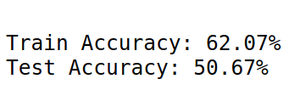


An accuracy of 50%+ in test data suggests that the classifier model is effective.

Step 9: Strategy implementation
We will predict the signal (buy or sell) using the cls.predict() function.

In [12]:
df['Predicted_Signal'] = cls.predict(X)


In [14]:
# Calculate daily returns
df['Return'] = df.Last_Close.pct_change()


In [15]:
# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)


In [16]:

# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()
df

,Symbol,Series,Prev_Close,Open,High,Low,Last_Close,VWAP,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,,,,
1996-01-01,RELIANCE,EQ,204.65,205.00,206.10,203.65,205.75,205.26,3717450,-0.75,2.45,1,NaN,NaN,NaN
1996-02-01,RELIANCE,EQ,205.75,205.25,206.25,202.65,204.15,204.13,6024650,1.10,3.60,1,-0.007776,-0.007776,-0.007776
1996-03-01,RELIANCE,EQ,204.15,207.50,216.95,205.25,205.70,207.04,7473500,1.80,11.70,1,0.007592,0.007592,-0.000184
1996-04-01,RELIANCE,EQ,205.70,203.75,204.40,201.05,203.80,202.47,7744000,-0.05,3.35,1,-0.009237,-0.009237,-0.009421
1996-05-01,RELIANCE,EQ,203.80,203.00,203.00,200.65,202.40,202.05,5952000,0.60,2.35,1,-0.006869,-0.006869,-0.016290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-23,RELIANCE,EQ,1899.50,1951.00,1970.00,1926.25,1950.70,1952.18,20918665,0.30,43.75,1,0.026954,0.000000,4.524238
2020-11-24,RELIANCE,EQ,1950.70,1964.00,1974.00,1932.00,1964.05,1952.11,14277083,-0.05,42.00,1,0.006844,0.006844,4.531081
2020-11-25,RELIANCE,EQ,1964.05,1980.00,1992.95,1942.20,1947.80,1969.06,15062376,32.20,50.75,1,-0.008274,-0.008274,4.522808


In [17]:

# Plot Strategy Cumulative returns 
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df

,Symbol,Series,Prev_Close,Open,High,Low,Last_Close,VWAP,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,,,,
1996-01-01,RELIANCE,EQ,204.65,205.00,206.10,203.65,205.75,205.26,3717450,-0.75,2.45,1,NaN,NaN,NaN,NaN
1996-02-01,RELIANCE,EQ,205.75,205.25,206.25,202.65,204.15,204.13,6024650,1.10,3.60,1,-0.007776,-0.007776,-0.007776,-0.007776
1996-03-01,RELIANCE,EQ,204.15,207.50,216.95,205.25,205.70,207.04,7473500,1.80,11.70,1,0.007592,0.007592,-0.000184,-0.000184
1996-04-01,RELIANCE,EQ,205.70,203.75,204.40,201.05,203.80,202.47,7744000,-0.05,3.35,1,-0.009237,-0.009237,-0.009421,-0.009421
1996-05-01,RELIANCE,EQ,203.80,203.00,203.00,200.65,202.40,202.05,5952000,0.60,2.35,1,-0.006869,-0.006869,-0.016290,-0.016290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-23,RELIANCE,EQ,1899.50,1951.00,1970.00,1926.25,1950.70,1952.18,20918665,0.30,43.75,1,0.026954,0.000000,4.524238,6.000851
2020-11-24,RELIANCE,EQ,1950.70,1964.00,1974.00,1932.00,1964.05,1952.11,14277083,-0.05,42.00,1,0.006844,0.006844,4.531081,6.007695
2020-11-25,RELIANCE,EQ,1964.05,1980.00,1992.95,1942.20,1947.80,1969.06,15062376,32.20,50.75,1,-0.008274,-0.008274,4.522808,5.999421


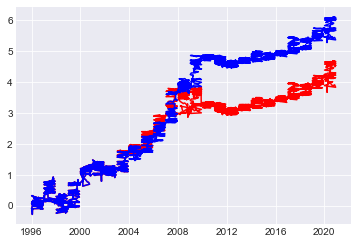

In [19]:

import matplotlib.pyplot as plt
%matplotlib inline
  
plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')